In [1]:
import json
import itertools
import numpy as np
from logger import Logger
import random
from collections import Counter

In [2]:
logger = Logger(show = True, html_output = True)
with open(logger.get_data_file('MSDialog-Intent.json')) as fp:
    msdialog_dict = json.load(fp)

logger.log("Number of dialogs {}".format(np.unique(list(msdialog_dict.keys())).shape[0]))

num_utterances = sum([len(item['utterances']) for item in msdialog_dict.values()])
logger.log("Number of utterances {}".format(num_utterances))

logger.log("Randomly selected final utterance {}".format(
    msdialog_dict[np.random.choice(list(msdialog_dict.keys()))]['utterances'][-1]))

2019.02.28-10:00:51 Initialize the logger
2019.02.28-10:00:51 Create logs folder logs
2019.02.28-10:00:51 Create log file logs\2019-02-28_10_00_51_log0.html
2019.02.28-10:00:51 Create models folder models
2019.02.28-10:00:51 Create output folder output
2019.02.28-10:00:51 Create data folder data
[2019.02.28-10:00:51] Number of dialogs 2199
[2019.02.28-10:00:51] Number of utterances 10020
[2019.02.28-10:00:51] Randomly selected final utterance {'id': 36317, 'utterance_pos': 8, 'actor_type': 'Agent', 'user_id': 'Bailey', 'utterance': "You're quite welcome.", 'vote': '0', 'utterance_time': '2017-04-04T03:12:31', 'affiliation': 'Community Moderator | Article Author', 'is_answer': 0, 'tags': 'GG'}


In [3]:
initial_tags = []
for item in msdialog_dict.values():
    crt_tags = [' '.join(utterance['tags'].split()) for utterance in item['utterances']]
    initial_tags += crt_tags

logger.log("Initial number of unique tags {}".format(len(set(initial_tags))))

[2019.02.28-10:00:51] Initial number of unique tags 345


In [4]:
ignored_labels = ['GG', 'JK', 'O']
ignored_combinations  = [item[0] + ' ' + item[1] for item in itertools.combinations(ignored_labels, 2)]
ignored_combinations += [item[1] + ' ' + item[0] for item in itertools.combinations(ignored_labels, 2)]

if set(initial_tags) & set(ignored_combinations):
    logger.log("Data contains combination of ignored labels: e.g {}".format(
                random.sample(set(initial_tags) & set(ignored_combinations), 1)))
    num_occurences_ignored_combinations = len([tag for tag in initial_tags if tag in ignored_combinations])
    logger.log("Number of this combinations is {}".format(num_occurences_ignored_combinations))

for item_key in msdialog_dict.keys():
    dialog = msdialog_dict[item_key]['utterances']
    for i, qa in enumerate(dialog):
        new_tag = ' '.join(qa['tags'].split())
        if any(label in new_tag for label in ignored_labels) and ' ' in new_tag and new_tag not in ignored_combinations:
            for label in ignored_labels:
                new_tag = new_tag.replace(label, "")
                
        msdialog_dict[item_key]['utterances'][i]['tags'] = ' '.join(new_tag.split())

all_tags = [utterance['tags'] for item in msdialog_dict.values() for utterance in item['utterances']]
logger.log("Number of unique tags after first preprocess step {}".format(len(set(all_tags))))

[2019.02.28-10:00:51] Data contains combination of ignored labels: e.g ['GG O']
[2019.02.28-10:00:51] Number of this combinations is 54
[2019.02.28-10:00:51] Number of unique tags after first preprocess step 179


In [5]:
occurences = dict(Counter(all_tags)).items()
occurences = sorted(occurences, key=lambda tup: tup[1], reverse = True)    

len(occurences)

179

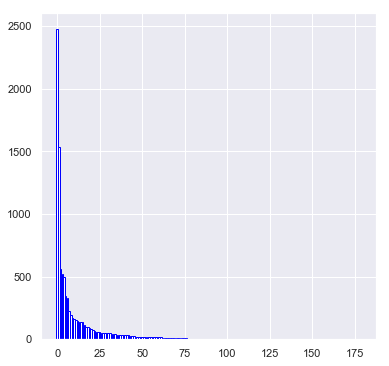

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig = plt.figure(figsize=(6, 6))
sns.set()
plt.bar(range(len(occurences)), [item[1] for item in occurences], width = 0.9, color = 'white', edgecolor = 'blue', log = False)
plt.savefig("test.jpg", dpi = 90)

In [25]:
total_num_occurences = sum([item[1] for item in occurences])
for first_90p_idx in range(len(occurences)):
    if sum([item[1] for item in occurences[:first_90p_idx]]) / total_num_occurences > 0.9:
        break
logger.log("Number of unique tags that made 90% of the occurences {}".format(first_90p_idx))
logger.log("{}".format([item[0] for item in occurences[:first_90p_idx]]))

[2019.02.28-10:28:54] Number of unique tags that made 90% of the occurences 37
[2019.02.28-10:28:54] ['PA', 'OQ', 'PF', 'PA FD', 'FD', 'GG', 'Q', 'IR PA', 'FD NF', 'FD Q', 'IR', 'RQ', 'PA IR', 'NF', 'PF FD', 'FQ FD', 'CQ FD', 'FQ', 'PA PF', 'FD RQ', 'CQ IR', 'FQ RQ', 'FD PF', 'CQ PA', 'FQ IR', 'FQ CQ', 'IR FD', 'JK', 'CQ IR PA', 'RQ Q', 'IR Q', 'NF Q', 'FQ FD NF', 'CQ', 'FQ PA', 'FQ PF', 'FQ NF']
